# lets start my discussing about the feature extraction methods and why we choose them.

## For this projct, we uses three feature extraction methods, namely TfidfVectorizer, CountVectorizer, document length.
## why did we use them, well lets talk about that:

## 1. CountVectorizer:
### CountVectorizer is a commonly used feature extraction technique in text classification tasks. It converts the text documents into a matrix of token counts, where each row represents a document and each column represents a specific word (token). The cell values indicate the frequency of each word in the corresponding document.

### The reason for using CountVectorizer is that it captures the occurrence of words in the documents, which can provide valuable information for classification. Words that are more frequent in certain categories may have higher discriminative power and can help distinguish between different classes. By including the count of each word as a feature, the model can learn the importance of specific words for classification.

## 2. TfidfVectorizer:
### TfidfVectorizer is another popular feature extraction method in text classification. TF-IDF stands for Term Frequency-Inverse Document ### Frequency. It calculates a weight for each word in each document based on its frequency within the document and its rarity in the entire ### corpus.

### The motivation behind using TfidfVectorizer is to give more importance to words that are informative for classification while downplaying ### common words that appear in many documents. Words that are frequent in a specific document but rare in the entire corpus are likely to carry ### more discriminative power. By using TF-IDF weights as features, the model can focus on important and distinctive words for classification.

## 3. Document Length:
### Including the length of each document (number of words) as a feature can provide additional information to the model. Document length can be ### indicative of the complexity or the amount of content in a document, and it may vary across different categories or classes.

### By incorporating document length as a feature, the model can learn patterns related to the length of documents that are associated with ### specific classes. For example, certain categories may have shorter or longer documents on average, and the model can use this information to ### make predictions.

### Overall, the combination of CountVectorizer, TfidfVectorizer, and document length as feature extraction methods provides a comprehensive ### representation of the text data, capturing different aspects such as word frequency, importance, and document length, which can be valuable ### for text classification tasks.

# The necessary imports

In [59]:
import os
import glob
import re
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Start by defining the function that will handle the preprocessing of the data and a class to that serves as the implementation of logistics regression

In [60]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.strip()
    doc_length = len(text.split())
    return text, doc_length


class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.biases = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((num_classes, num_features))
        self.biases = np.zeros(num_classes)

        for _ in range(self.num_iterations):
            scores = np.dot(X, self.weights.T) + self.biases
            y_pred = self.sigmoid(scores)

            error = y_pred - self.one_hot_encode(y, num_classes)
            gradient_weights = np.dot(X.T, error) / num_samples
            gradient_biases = np.mean(error, axis=0)

            self.weights -= self.learning_rate * gradient_weights.T
            self.biases -= self.learning_rate * gradient_biases

    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.biases
        y_pred = self.sigmoid(scores)
        return np.argmax(y_pred, axis=1)

    def one_hot_encode(self, y, num_classes):
        one_hot = np.zeros((len(y), num_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

# Read the files and store the datas for later use

In [61]:
parent_folder = 'bbc'
subfolders = ['business', 'entertainment', 'sport', 'politics', 'tech']

categories_count = defaultdict(int)
train_texts = []
train_lengths = []
train_labels = []

for subfolder in subfolders:
    folder_path = os.path.join(parent_folder, subfolder)
    files = glob.glob(os.path.join(folder_path, '*.txt'))

    categories_count[subfolder] += len(files)

    for file_path in files[:10]:
        train_labels.append(subfolder)
        with open(file_path, 'r') as file:
            content = file.read()
            text, length = preprocess_text(content)
            train_texts.append(text)
            train_lengths.append(length)

# Extracting the features. it should be noted that we are extracting all three features we stated earlier


In [62]:

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train_texts)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)

train_lengths = np.array(train_lengths).reshape(-1, 1)

X_train = np.concatenate((X_train_counts.toarray(), X_train_tfidf.toarray(), train_lengths), axis=1)

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(train_labels)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_numeric, test_size=0.2, random_state=42)

# Define the hyper parameters we will use

In [63]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]

# Test the model with the predifined hyperparameters and store the best performance along side with the hyperparameters


In [64]:

results = []
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results.append((lr, accuracy))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'learning_rate': lr}

/tmp/ipykernel_7425/3639642550.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_7425/3639642550.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_7425/3639642550.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_7425/3639642550.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


# Finally lets use the matplotlib to visualize our findings.

Best Parameters: {'learning_rate': 0.001}
Best Accuracy: 0.3


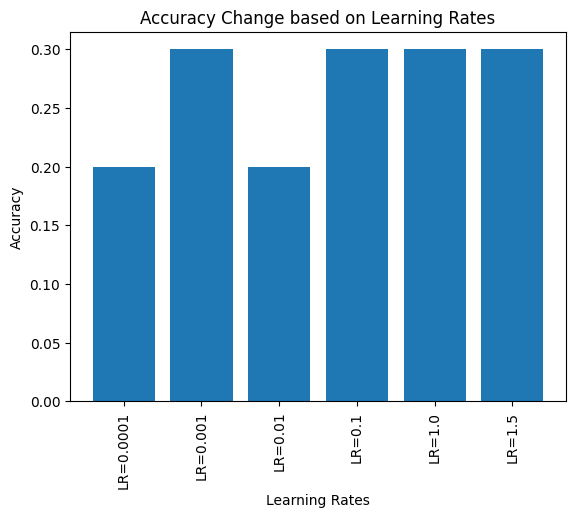

In [65]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Plot accuracy change based on hyperparameter variations
fig, ax = plt.subplots()
x = range(len(results))
y = [result[1] for result in results]
labels = [f"LR={result[0]}" for result in results]
ax.bar(x, y, tick_label=labels)
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Change based on Learning Rates')
plt.xticks(rotation=90)
plt.show()
